<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [55]:
%pip install scipy

from scipy.stats import kde
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [39]:
#before deciding the details of distribution plot, let's see the data
df['ConvertedComp'].head()

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

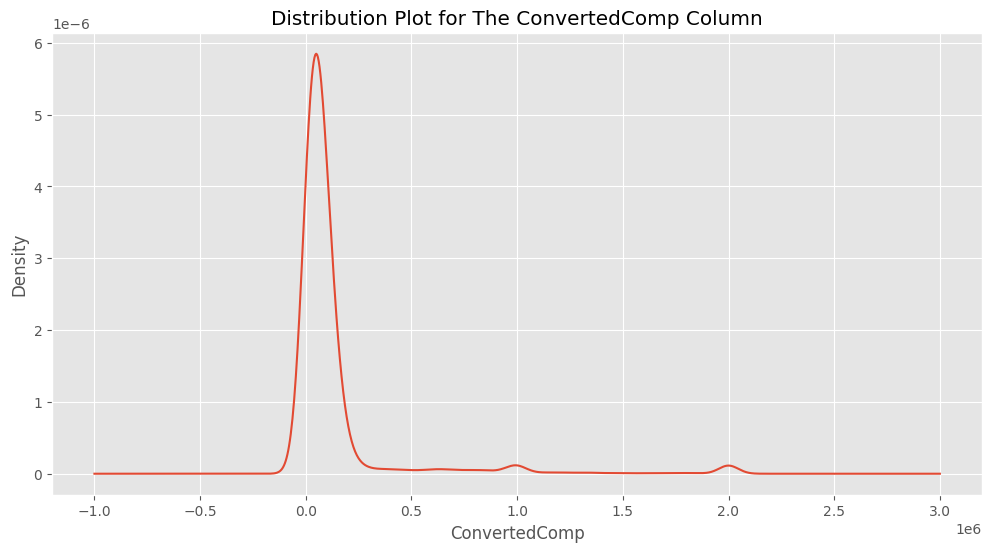

In [101]:
# your code goes here
df['ConvertedComp'].plot(kind='density', figsize=(12, 6))
plt.xlabel('ConvertedComp')
plt.title('Distribution Plot for The ConvertedComp Column')
plt.show()

Plot the histogram for the column `ConvertedComp`.


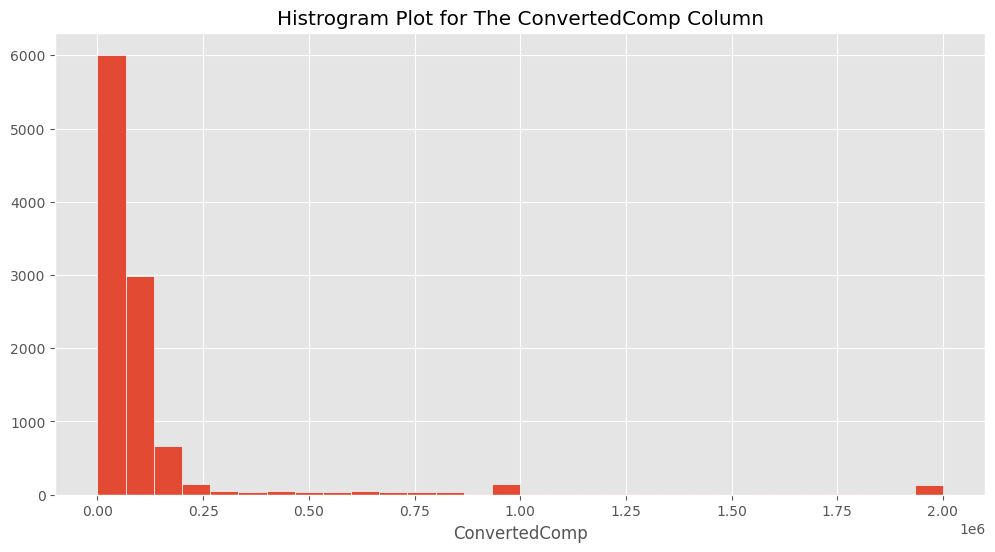

In [104]:
# your code goes here
plt.figure(figsize=(12, 6))
plt.hist(df['ConvertedComp'],bins=30, edgecolor= 'w')
plt.xlabel('ConvertedComp')
plt.title('Histrogram Plot for The ConvertedComp Column')
plt.show()

What is the median of the column `ConvertedComp`?


In [209]:
# your code goes here
stat_conv = df['ConvertedComp'].describe()
print('The median (50th percentile) of ConvertedComp is :', stat_conv['50%'])

The median (50th percentile) of ConvertedComp is : 57745.0


How many responders identified themselves only as a **Man**?


In [88]:
# your code goes here
stat_gender = df['Gender'].value_counts()
print('The responders identified themselves only as a Man is', stat_gender['Man'])

The responders identified themselves only as a Man is 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [98]:
# your code goes here
stat_conv_woman = df['ConvertedComp'][(df.Gender == 'Woman')].describe()
print('The median of responders that are identified themselves only as woman is', stat_conv_woman['50%'])

The median of responders that are identified themselves only as woman is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [99]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [120]:
bins = (df['Age'].max() - df['Age'].min())/2
bins

41.5

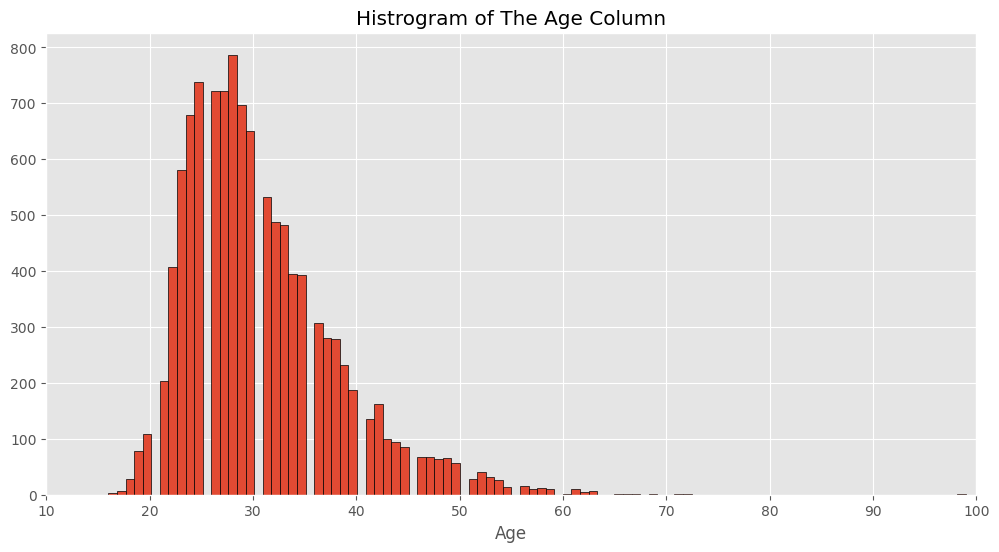

In [165]:
# your code goes here
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=100, edgecolor='k')
plt.xlabel('Age')

tick = list(map(str, range(0, 110,10)))
tix = []

for item in tick:
  tix.append(int(item))
    
plt.xticks(tix)
plt.title('Histrogram of The Age Column')
plt.xlim(10,100)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


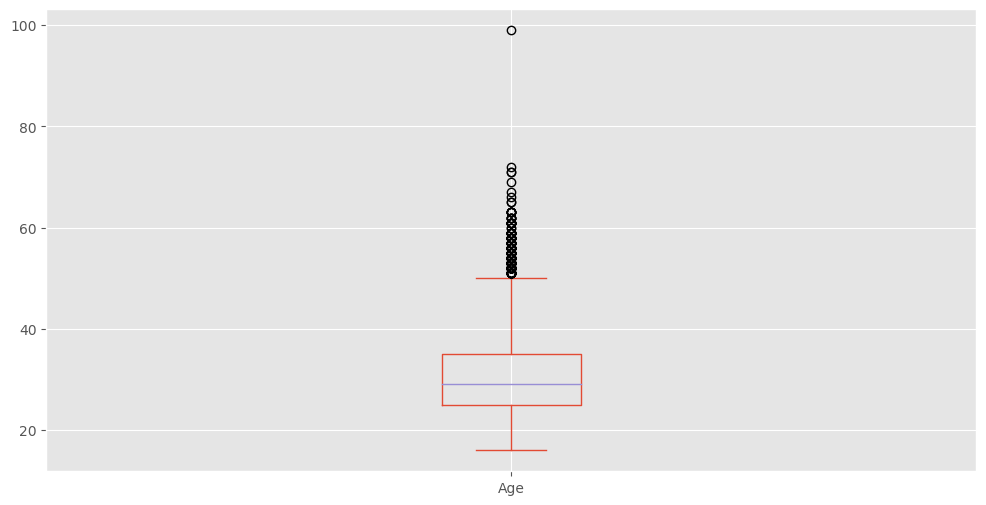

In [158]:
#In this time I will use matplotlib instead of pyplot beacause:
#The pandas Series plot method acts better that understands how to use the data in the Series to create a boxplot using Matplotlib behind the scenes.
plt.figure(figsize=(12, 6))
df['Age'].plot(kind='box')
plt.title('Boxplot of ConvertedComp Column')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [160]:
# your code goes here
quartile_1 = df['ConvertedComp'].quantile(0.25)
quartile_3 = df['ConvertedComp'].quantile(0.75)

IQR = quartile_3 - quartile_1
print('The value of Inter Quartile Range is', IQR)

The value of Inter Quartile Range is 73132.0


Find out the upper and lower bounds.


In [161]:
# your code goes here
up_bound = quartile_3 + IQR*1.5
print('Upper bound is', up_bound)

lo_bound = quartile_1 - IQR*1.5
print('Lower bound is', lo_bound)

Upper bound is 209698.0
Lower bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [163]:
# your code goes here
outlier = 0

for i in df['ConvertedComp']:
    if (i < lo_bound) or (i > up_bound):
        outlier = outlier + 1

outlier

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [215]:
# your code goes here
# using union ( | ) to quick method compared to concat upper outlier and lower outlier in pandas 
index_outlier = df[(df['ConvertedComp'] > up_bound) | (df['ConvertedComp'] < lo_bound)].index
df_new = df.drop(index_outlier)
df_new.shape

(10519, 85)

In [217]:
df_new['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [205]:
# your code goes here
df.corr()

<ipython-input-205-2278162ba8b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
